In [1]:
import pandas as pd
import glob
import re
import os

In [9]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_stata("Data Sampel Final 2022/Reguler/202103_fkrtl.dta")
df.head()

,PSTV01,PSTV02,PSTV15,FKP02,FKL02,FKL03,FKL04,FKL05,FKL06,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,FKL13,FKL14,FKL15,FKL15A,FKL16,FKL16A,FKL17,FKL17A,FKL18,FKL18A,FKL19,FKL19A,FKL20,FKL21,FKL22,FKL23,FKL25,FKL26,FKL27,FKL28,FKL29,FKL30,FKL31,FKL32,FKL33,FKL34,FKL35,FKL36,FKL37,FKL38,FKL39,FKL40,FKL41,FKL42,FKL43,FKL44,FKL45,FKL46,FKL47,FKL48
0,455297864,354398080,10.273760,,134540221V000105,2021-02-26,2021-02-28,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,Swasta,Rumah sakit,Khusus Ibu dan Anak,RITL,Missing,PBI APBD,Kelas 3,Sehat,P03 Fetus and newborn affected by other compli...,P03,P034,Fetus and newborn affected by caesarean delivery,,,,,P-8-17-I,"NEONATAL, BBL GROUP-5 TANPA PROSEDUR MAYOR RINGAN",P. Newborns & Neonates Groups,Rawat Inap Neonatal,17,Ringan (rawat inap keparahan 1),DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,Swasta,Rumah sakit,KHUSUS IBU DAN ANAK,,regional 1,3426200,,0,,,0,,,0,,,0,,,0,3426200,3426200
1,428331611,355534480,248.677673,,459250521V000580,2021-05-31,2021-06-02,JAWA TIMUR,SIDOARJO,Swasta,Rumah sakit,RS Kelas D,RITL,Missing,PBI APBD,Kelas 3,Sehat,R50 Fever of other and unknown origin,R50,R509,"Fever, unspecified",A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,A-4-14-I,PENYAKIT INFEKSI BAKTERI DAN PARASIT LAIN-LAI...,A. Infectious & parasitic diseases Grou,Rawat Inap Bukan Prosedur,14,Ringan (rawat inap keparahan 1),JAWA TIMUR,SIDOARJO,Swasta,Rumah sakit,RS KELAS D,,regional 1,2155300,,0,,,0,,,0,,,0,,,0,2155300,2155300
2,159537057,159537057,36.873344,,242680121V000408,2021-01-04,2021-01-07,ACEH,KOTA LHOKSEUMAWE,TNI AD,Rumah sakit,RS TNI Polri Kelas IV,RITL,Missing,PPU,Kelas 2,Sehat,A09 Other gastroenteritis and colitis of infec...,A09,A099,Gastroenteritis and colitis of unspecified origin,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,A-4-14-I,PENYAKIT INFEKSI BAKTERI DAN PARASIT LAIN-LAI...,A. Infectious & parasitic diseases Grou,Rawat Inap Bukan Prosedur,14,Ringan (rawat inap keparahan 1),ACEH,KOTA LHOKSEUMAWE,TNI AD,Rumah sakit,RS TNI POLRI KELAS IV,,regional 3,2541200,,0,,,0,,,0,,,0,,,0,2541200,2541200
3,87132631,98569517,92.235886,,112271221V002764,2021-12-20,2021-12-25,JAWA TENGAH,GROBOGAN,Swasta,Rumah sakit,RS Swasta Setara Type D,RITL,Missing,PPU,Kelas 2,Sehat,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,A-4-14-I,PENYAKIT INFEKSI BAKTERI DAN PARASIT LAIN-LAI...,A. Infectious & parasitic diseases Grou,Rawat Inap Bukan Prosedur,14,Ringan (rawat inap keparahan 1),JAWA TENGAH,GROBOGAN,Swasta,Rumah sakit,RS SWASTA SETARA TYPE D,,regional 1,2586400,,0,,,0,,,0,,,0,,,0,2586400,2586400
4,25031617,14211084,78.579094,,321561121V004514,2021-11-21,2021-11-25,JAWA BARAT,BANDUNG,Swasta,Rumah sakit,RS Swasta Setara Type C,RITL,Missing,PPU,Kelas 2,Sehat,R50 Fever of other and unknown origin,R50,R509,"Fever, unspecified",A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,A-4-14-I,PENYAKIT INFEKSI BAKTERI DAN PARASIT LAIN-LAI...,A. Infectious & parasitic diseases Grou,Rawat Inap Bukan Prosedur,14,Ringan (rawat inap keparahan 1),JAWA BARAT,BANDUNG,Swasta,Rumah sakit,RS SWASTA SETARA TYPE C,9394 - Respiratory medication administered by ...,regional 1,2586400,,0,,,0,,,0,,,0,,,0,2586400,2586400


In [15]:
renamed_columns = {'PSTV01' : 'Nomor peserta',
                'PSTV02' : 'Nomor keluarga',
                'PSTV15' : 'Bobot',
                'FKP02' : 'No Asal Rujukan (ID Kunjungan FKTP)',
                'FKL02' : 'ID Kunjungan',
                'FKL03' : 'Tanggal datang kunjungan FKRTL',
                'FKL04' : 'Tanggal pulang kunjungan FKRTL',
                'FKL05' : 'Provinsi FKRTL',
                'FKL06' : 'Kabupaten/Kota FKRTL',
                'FKL07' : 'Kepemilikan FKRTL',
                'FKL08' : 'Jenis FKRTL',
                'FKL09' : 'Tipe FKRTL',
                'FKL10' : 'Tingkat Pelayanan FKRTL',
                'FKL11' : 'Jenis Poli FKRTL',
                'FKL12' : 'Segmen Peserta saat akses layanan FKRTL',
                'FKL13' : 'Kelas iuran premi peserta saat akses layanan FKRTL',
                'FKL14' : 'Status pulang dari FKRTL',
                'FKL15' : 'Kode dan nama diagnosis masuk ICD 10 (3 digit)',
                'FKL15A' : 'Kode diagnosis masuk ICD 10 (3 digit)',
                'FKL16' : 'Kode ICD 10 diagnosis masuk FKRTL (3-6digit)',
                'FKL16A' : 'Nama diagnosis masuk FKRTL (3-6digit)',
                'FKL17' : 'Kode dan nama diagnosis primer ICD 10 (3 digit)',
                'FKL17A' : 'Kode diagnosis primer ICD 10 (3 digit)',
                'FKL18' : 'Kode ICD 10 diagnosis primer FKRTL (3-6digit)',
                'FKL18A' : 'Nama diagnosis primer FKRTL (3-6digit)',
                'FKL19' : 'Kode INACBGs',
                'FKL19A' : 'Deskripsi kode INACBGs',
                'FKL20' : 'INACBGs - Kode Casemix main groups (Digit ke-1)',
                'FKL21' : 'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)',
                'FKL22' : 'INACBGs - Spesifikasi kelompok kasus (Digit ke-3)',
                'FKL23' : 'INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)',
                'FKL25' : 'Provinsi faskes perujuk',
                'FKL26' : 'Kabupaten/Kota faskes perujuk',
                'FKL27' : 'Kepemilikan faskes perujuk',
                'FKL28' : 'Jenis faskes perujuk',
                'FKL29' : 'Tipe faskes perujuk',
                'FKL30' : 'Jenis prosedur',
                'FKL31' : 'Tarif regional INACBGs',
                'FKL32' : 'Group Tarif INACBGs',
                'FKL33' : 'Kode special sub-acute groups (SA)',
                'FKL34' : 'Tarif special sub-acute groups (SA)',
                'FKL35' : 'Kode special procedures (SP)',
                'FKL36' : 'Deskripsi special procedures (SP)',
                'FKL37' : 'Tarif special procedures (SP)',
                'FKL38' : 'Kode special prosthesis (RR)',
                'FKL39' : 'Deskripsi special prosthesis (RR)',
                'FKL40' : 'Tarif special prosthesis (RR)',
                'FKL41' : 'Kode special investigation(SI)',
                'FKL42' : 'Deskripsi special investigation(SI)',
                'FKL43' : 'Tarif special investigation(SI)',
                'FKL44' : 'Kode special drugs (SD)',
                'FKL45' : 'Deskripsi special drugs (SD)',
                'FKL46' : 'Tarif special drugs (SD)',
                'FKL47' : 'Biaya Tagih - oleh fasilitas kesehatan (provider)',
                'FKL48' : 'Biaya Verifikasi - BPJS Kesehatan setelah dilakukan verifikasi'}

In [16]:
df.rename(columns = renamed_columns, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872201 entries, 0 to 872200
Data columns (total 55 columns):
 #   Column                                                          Non-Null Count   Dtype         
---  ------                                                          --------------   -----         
 0   Nomor peserta                                                   872201 non-null  int32         
 1   Nomor keluarga                                                  872201 non-null  int32         
 2   Bobot                                                           872201 non-null  float32       
 3   No Asal Rujukan (ID Kunjungan FKTP)                             872201 non-null  object        
 4   ID Kunjungan                                                    872201 non-null  object        
 5   Tanggal datang kunjungan FKRTL                                  872201 non-null  datetime64[ns]
 6   Tanggal pulang kunjungan FKRTL                                  872201 non-n

In [18]:
cat_columns = []
for col in df.columns:
    if df[col].dtype == "category":
        cat_columns.append(col)
        print(f"Column {col} Value Counts: ")
        print(f"{df[col].value_counts()}\n")

Column Provinsi FKRTL Value Counts: 
JAWA TENGAH                   151653
JAWA BARAT                    123894
JAWA TIMUR                    111998
DKI JAKARTA                    43277
SUMATERA UTARA                 42422
BALI                           38107
SULAWESI SELATAN               35401
BANTEN                         27037
RIAU                           26892
SUMATERA BARAT                 26194
DAERAH ISTIMEWA YOGYAKARTA     24784
SUMATERA SELATAN               23439
KALIMANTAN TIMUR               19509
KALIMANTAN SELATAN             19013
LAMPUNG                        18003
SULAWESI UTARA                 16371
ACEH                           16126
NUSA TENGGARA BARAT            11319
NUSA TENGGARA TIMUR            11008
KALIMANTAN BARAT                9534
SULAWESI TENGAH                 9199
KEPULAUAN RIAU                  9096
SULAWESI TENGGARA               8031
BENGKULU                        7432
KALIMANTAN TENGAH               6574
PAPUA                           6470
J

In [19]:
print(df.iloc[:, -1].sum() - df.iloc[:, -2].sum())

-956956694


In [20]:
df.columns[-1]

'Biaya Verifikasi - BPJS Kesehatan setelah dilakukan verifikasi'

In [21]:
import matplotlib.pyplot as plt

### Harga

Persentase Biaya Tagihan yang tidak terbayarkan : Rp956956694
Persentase Biaya Verifikasi dari Tagihan yang diberikan : 99.874%


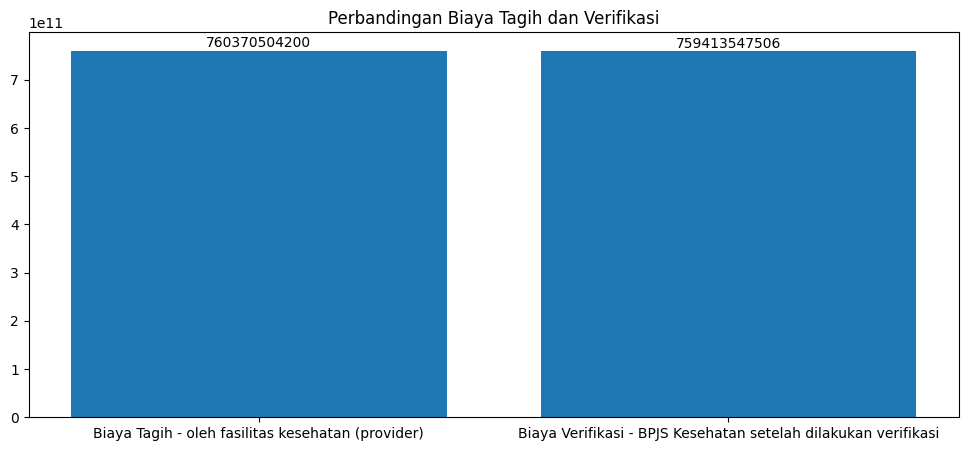

In [22]:
plt.figure(figsize=(12, 5))

labels = [df.columns[-2], df.columns[-1]]
values = [(df.iloc[:, -2].sum()), df.iloc[:, -1].sum()]

ax = plt.bar(labels, values)
plt.title("Perbandingan Biaya Tagih dan Verifikasi")
rects = ax.patches
for rect, value in zip(rects, values):
    height = rect.get_height()
    plt.text(
        rect.get_x() + rect.get_width() / 2, height + 1e9, value, ha="center", va="bottom")

print(f"Persentase Biaya Tagihan yang tidak terbayarkan : Rp{abs(values[1] - values[0])}")
print(f"Persentase Biaya Verifikasi dari Tagihan yang diberikan : {round(values[1] / values[0] * 100, 3)}%")

permasalahan:
- korupsi dan penyalahgunaan dana (gaada data)
- ketidaksetaraan akses pelayanan (gaada data)
- tingkat kesadaran peserta (pembayaran) (gaada data)
- kualitas layanan kesehatan (gaada data)
- peningkatan jumlah peserta (gatau bisa apa ngga datanya)

yang bisa dilakuin dari data fkrtl:
- pemetaan penyakit dan ketersediaan faskes
- analisis poli yg paling banyak dikunjungi (distribusinya terus tambahin biaya(?)) -> done
- pake kolom INACBGs ft biaya pelayanan nanti but ptediksi biaya 
- analisis kaitan biaya tagih dan biaya verifikasi

### Poli

In [151]:
df['Jenis Poli FKRTL'] = df['Jenis Poli FKRTL'].replace('Diluar Poli', 'Non-Poli')
df['Jenis Poli FKRTL'].unique()

['Non-Poli', 'IGD', 'INT', 'SAR', 'ANA', ..., 'AND', 'PTD', 'GOR', 'RDO', 'PAK']
Length: 42
Categories (42, object): ['INT' < 'BED' < 'SAR' < 'MAT' ... 'RDO' < 'RDT' < 'BKL' < 'Non-Poli']

In [319]:
poli_agg = df.groupby('Jenis Poli FKRTL').agg(
            count=('Jenis Poli FKRTL', 'count'),
            sum_klaim=('Biaya Tagih - oleh fasilitas kesehatan (provider)', 'sum'),
            sum_verif=('Biaya Verifikasi - BPJS Kesehatan setelah dilakukan verifikasi', 'sum'),
        )
poli_agg['sum_dif'] = poli_agg.apply(lambda x: x[-2] - x[-1], axis=1)
poli_agg.reset_index(inplace=True)

c:\Users\hufah\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


In [320]:
for col in poli_agg.columns[2:]:
    poli_agg[col] = round(poli_agg[col] / 1e6, 2)
poli_agg.sort_values(by='sum_dif', ascending=True, inplace=True)
poli_agg.reset_index(inplace=True, drop=True)
poli_agg.head()

,Jenis Poli FKRTL,count,sum_klaim,sum_verif,sum_dif
0,INT,146644,36302.20,36302.20,0.0
1,AND,4,1.29,1.29,0.0
2,ANT,212,73.44,73.44,0.0
3,BTK,864,443.15,443.15,0.0
4,GND,5506,1562.15,1562.15,0.0


In [321]:
poli_agg[poli_agg['sum_dif'] > 0]['Jenis Poli FKRTL'][:-1]

38    BED
39    IRM
40    ORT
Name: Jenis Poli FKRTL, dtype: category
Categories (42, object): ['INT' < 'BED' < 'SAR' < 'MAT' ... 'RDO' < 'RDT' < 'BKL' < 'Missing']

Text(0.5, 1.0, 'Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Jenis Poli')

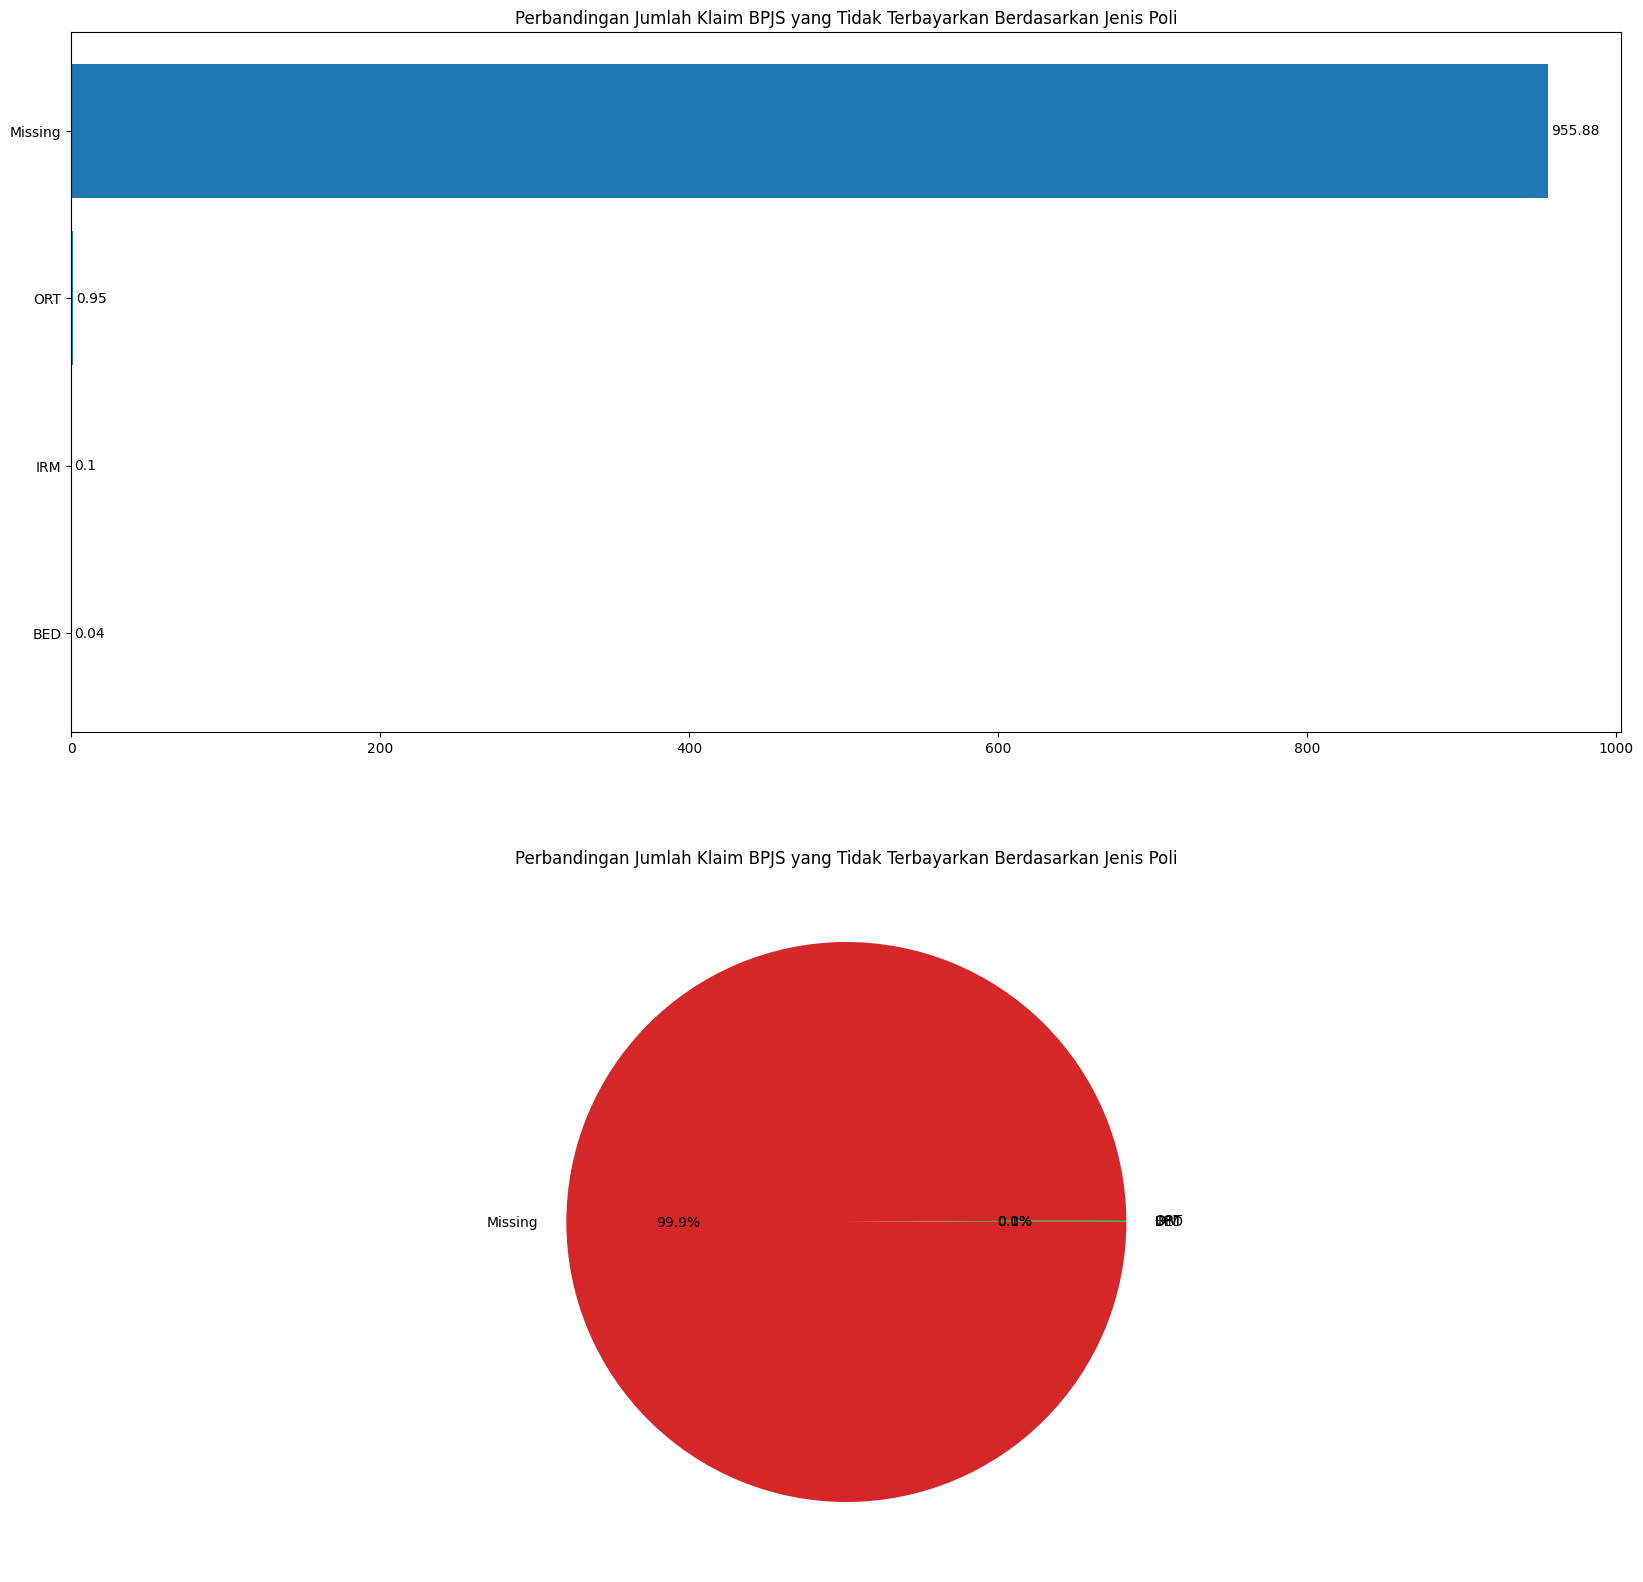

In [325]:
plt.figure(figsize=(20, 20))

labels = poli_agg[poli_agg['sum_dif'] > 0]['Jenis Poli FKRTL']
values = poli_agg[poli_agg['sum_dif'] > 0]['sum_dif']

plt.subplot(2, 1, 1)
plt.barh(labels, values)
plt.title("Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Jenis Poli")
for i, value in enumerate(values):
    height = rect.get_height()
    plt.text(
        (value + 2), i, value, ha="left", va="center")

plt.subplot(2, 1, 2)
plt.pie(values, labels=labels, autopct='%.1f%%')
plt.title('Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Jenis Poli')


Text(0.5, 1.0, 'Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Jenis Poli')

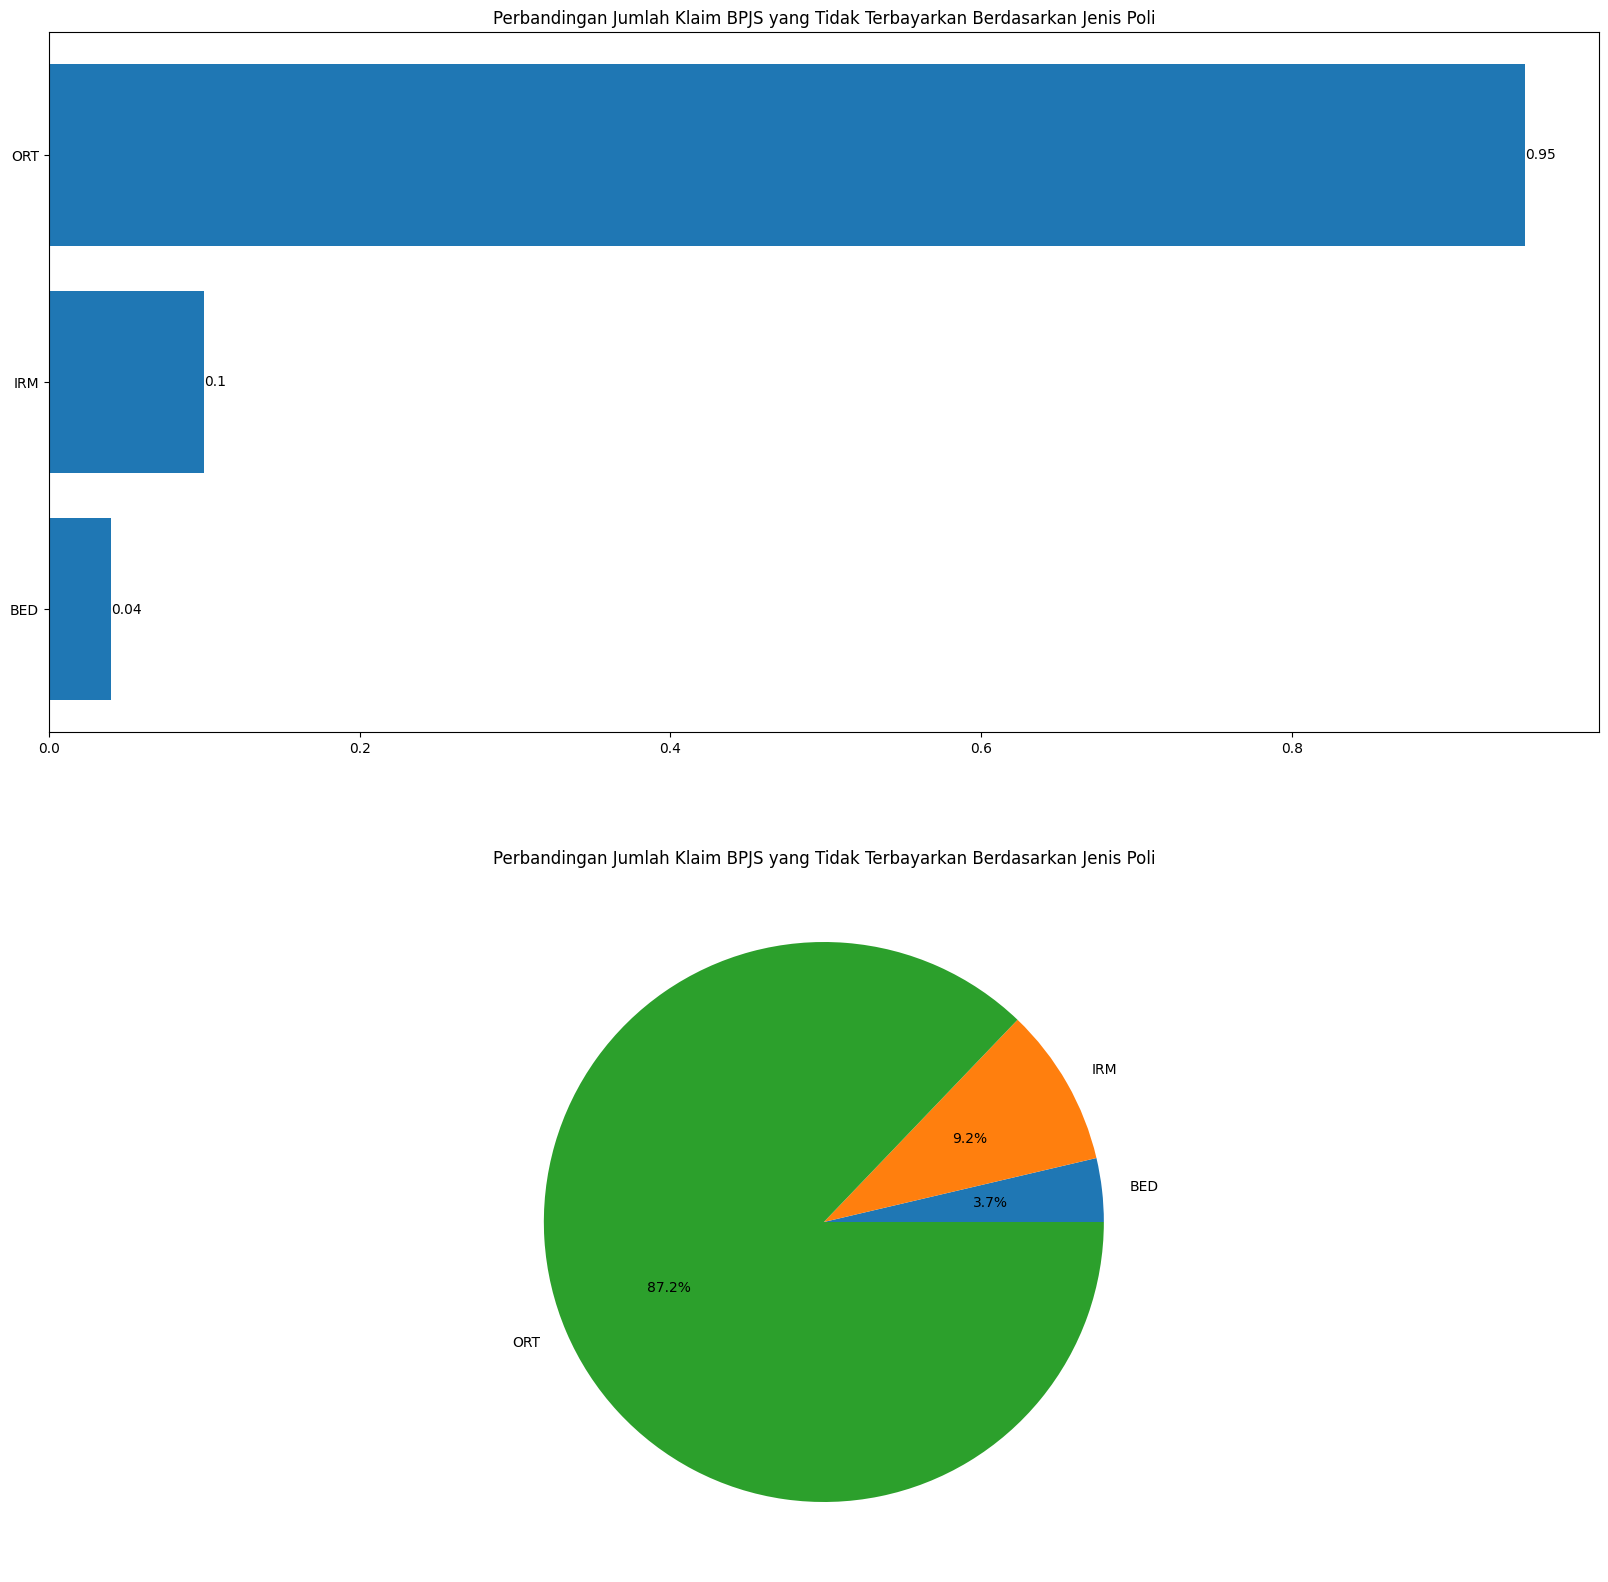

In [329]:
plt.figure(figsize=(20, 20))

labels = poli_agg[poli_agg['sum_dif'] > 0]['Jenis Poli FKRTL'][:-1]
values = poli_agg[poli_agg['sum_dif'] > 0]['sum_dif'][:-1]

plt.subplot(2, 1, 1)
plt.barh(labels, values)
plt.title("Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Jenis Poli")
for i, value in enumerate(values):
    height = rect.get_height()
    plt.text(
        (value), i, value, ha="left", va="center")

plt.subplot(2, 1, 2)
plt.pie(values, labels=labels, autopct='%.1f%%')
plt.title('Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Jenis Poli')


#### Poli ORT, IRM, BED

In [168]:
df_temp = df[df['Jenis Poli FKRTL'].isin(['ORT', 'IRM', 'BED'])]
df_temp['Jenis Poli FKRTL'].cat.remove_unused_categories(inplace=True)
df_temp['Jenis Poli FKRTL']

C:\Users\hufah\AppData\Local\Temp\ipykernel_18672\4099557503.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_temp['Jenis Poli FKRTL'].cat.remove_unused_categories(inplace=True)


1991      BED
2020      BED
4131      BED
4334      BED
4345      BED
         ... 
868628    BED
869780    IRM
870093    IRM
870133    BED
871280    BED
Name: Jenis Poli FKRTL, Length: 134035, dtype: category
Categories (3, object): ['BED' < 'IRM' < 'ORT']

In [169]:
poli_agg_parah = df_temp.groupby(['Jenis Poli FKRTL', 'INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)']).agg(
            count=('INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)', 'count'),
        )
poli_agg_parah

count
Jenis Poli FKRTL INACBGs - Tingkat keparahan kelompok kasus(Digi...       
BED               Rawat Jalan                                        48003
                  Ringan (rawat inap keparahan 1)                        0
                  Sedang (rawat inap keparahan 2)                        0
                  Berat (rawat inap keparahan 3)                         0
IRM               Rawat Jalan                                        63468
                  Ringan (rawat inap keparahan 1)                        0
                  Sedang (rawat inap keparahan 2)                        0
                  Berat (rawat inap keparahan 3)                         0
ORT               Rawat Jalan                                        22564
                  Ringan (rawat inap keparahan 1)                        0
                  Sedang (rawat inap keparahan 2)                        0
                  Berat (rawat inap keparahan 3)                         0

### INACBGs

In [314]:
inacbg_agg = df.groupby('INACBGs - Kode Casemix main groups (Digit ke-1)').agg(
            count=('INACBGs - Kode Casemix main groups (Digit ke-1)', 'count'),
            sum_klaim=('Biaya Tagih - oleh fasilitas kesehatan (provider)', 'sum'),
            sum_verif=('Biaya Verifikasi - BPJS Kesehatan setelah dilakukan verifikasi', 'sum'),
        )
inacbg_agg['sum_dif'] = inacbg_agg.apply(lambda x: x[-2] - x[-1], axis=1)
inacbg_agg.reset_index(inplace=True)
inacbg_agg.iloc[:, 2:] = round(inacbg_agg.iloc[:, 2:] / 1e6, 2)

c:\Users\hufah\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


In [315]:
inacbg_agg.sort_values(by='sum_dif', ascending=True, inplace=True)
inacbg_agg.reset_index(inplace=True, drop=True)
inacbg_agg

,INACBGs - Kode Casemix main groups (Digit ke-1),count,sum_klaim,sum_verif,sum_dif
0,"S. Injuries, poisonings & toxic effects",299,1021.42,1021.42,0.00
1,T. Substance abuse & dependence Groups,1,2.86,2.86,0.00
2,C. Myeloproliferative system & neoplasm,12682,24748.13,24748.13,0.00
3,V. Male reproductive System Groups,933,6937.46,6937.43,0.02
4,Q. Ambulatory Groups-Episodic,478480,102323.70,102323.06,0.65
5,Z. Factors influencing health status &,84978,32283.99,32282.58,1.42
6,P. Newborns & Neonates Groups,8639,37696.41,37694.69,1.72
7,D. Haemopoeitic & immune system Groups,4311,11310.99,11308.70,2.29
8,H. Eye and Adnexa Groups,25562,40360.81,40355.93,4.88
9,B. Hepatobiliary & pancreatic system Gr,1914,10238.97,10233.87,5.11


Text(0.5, 1.0, 'Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan INACBG - Main Group (Digit 1)')

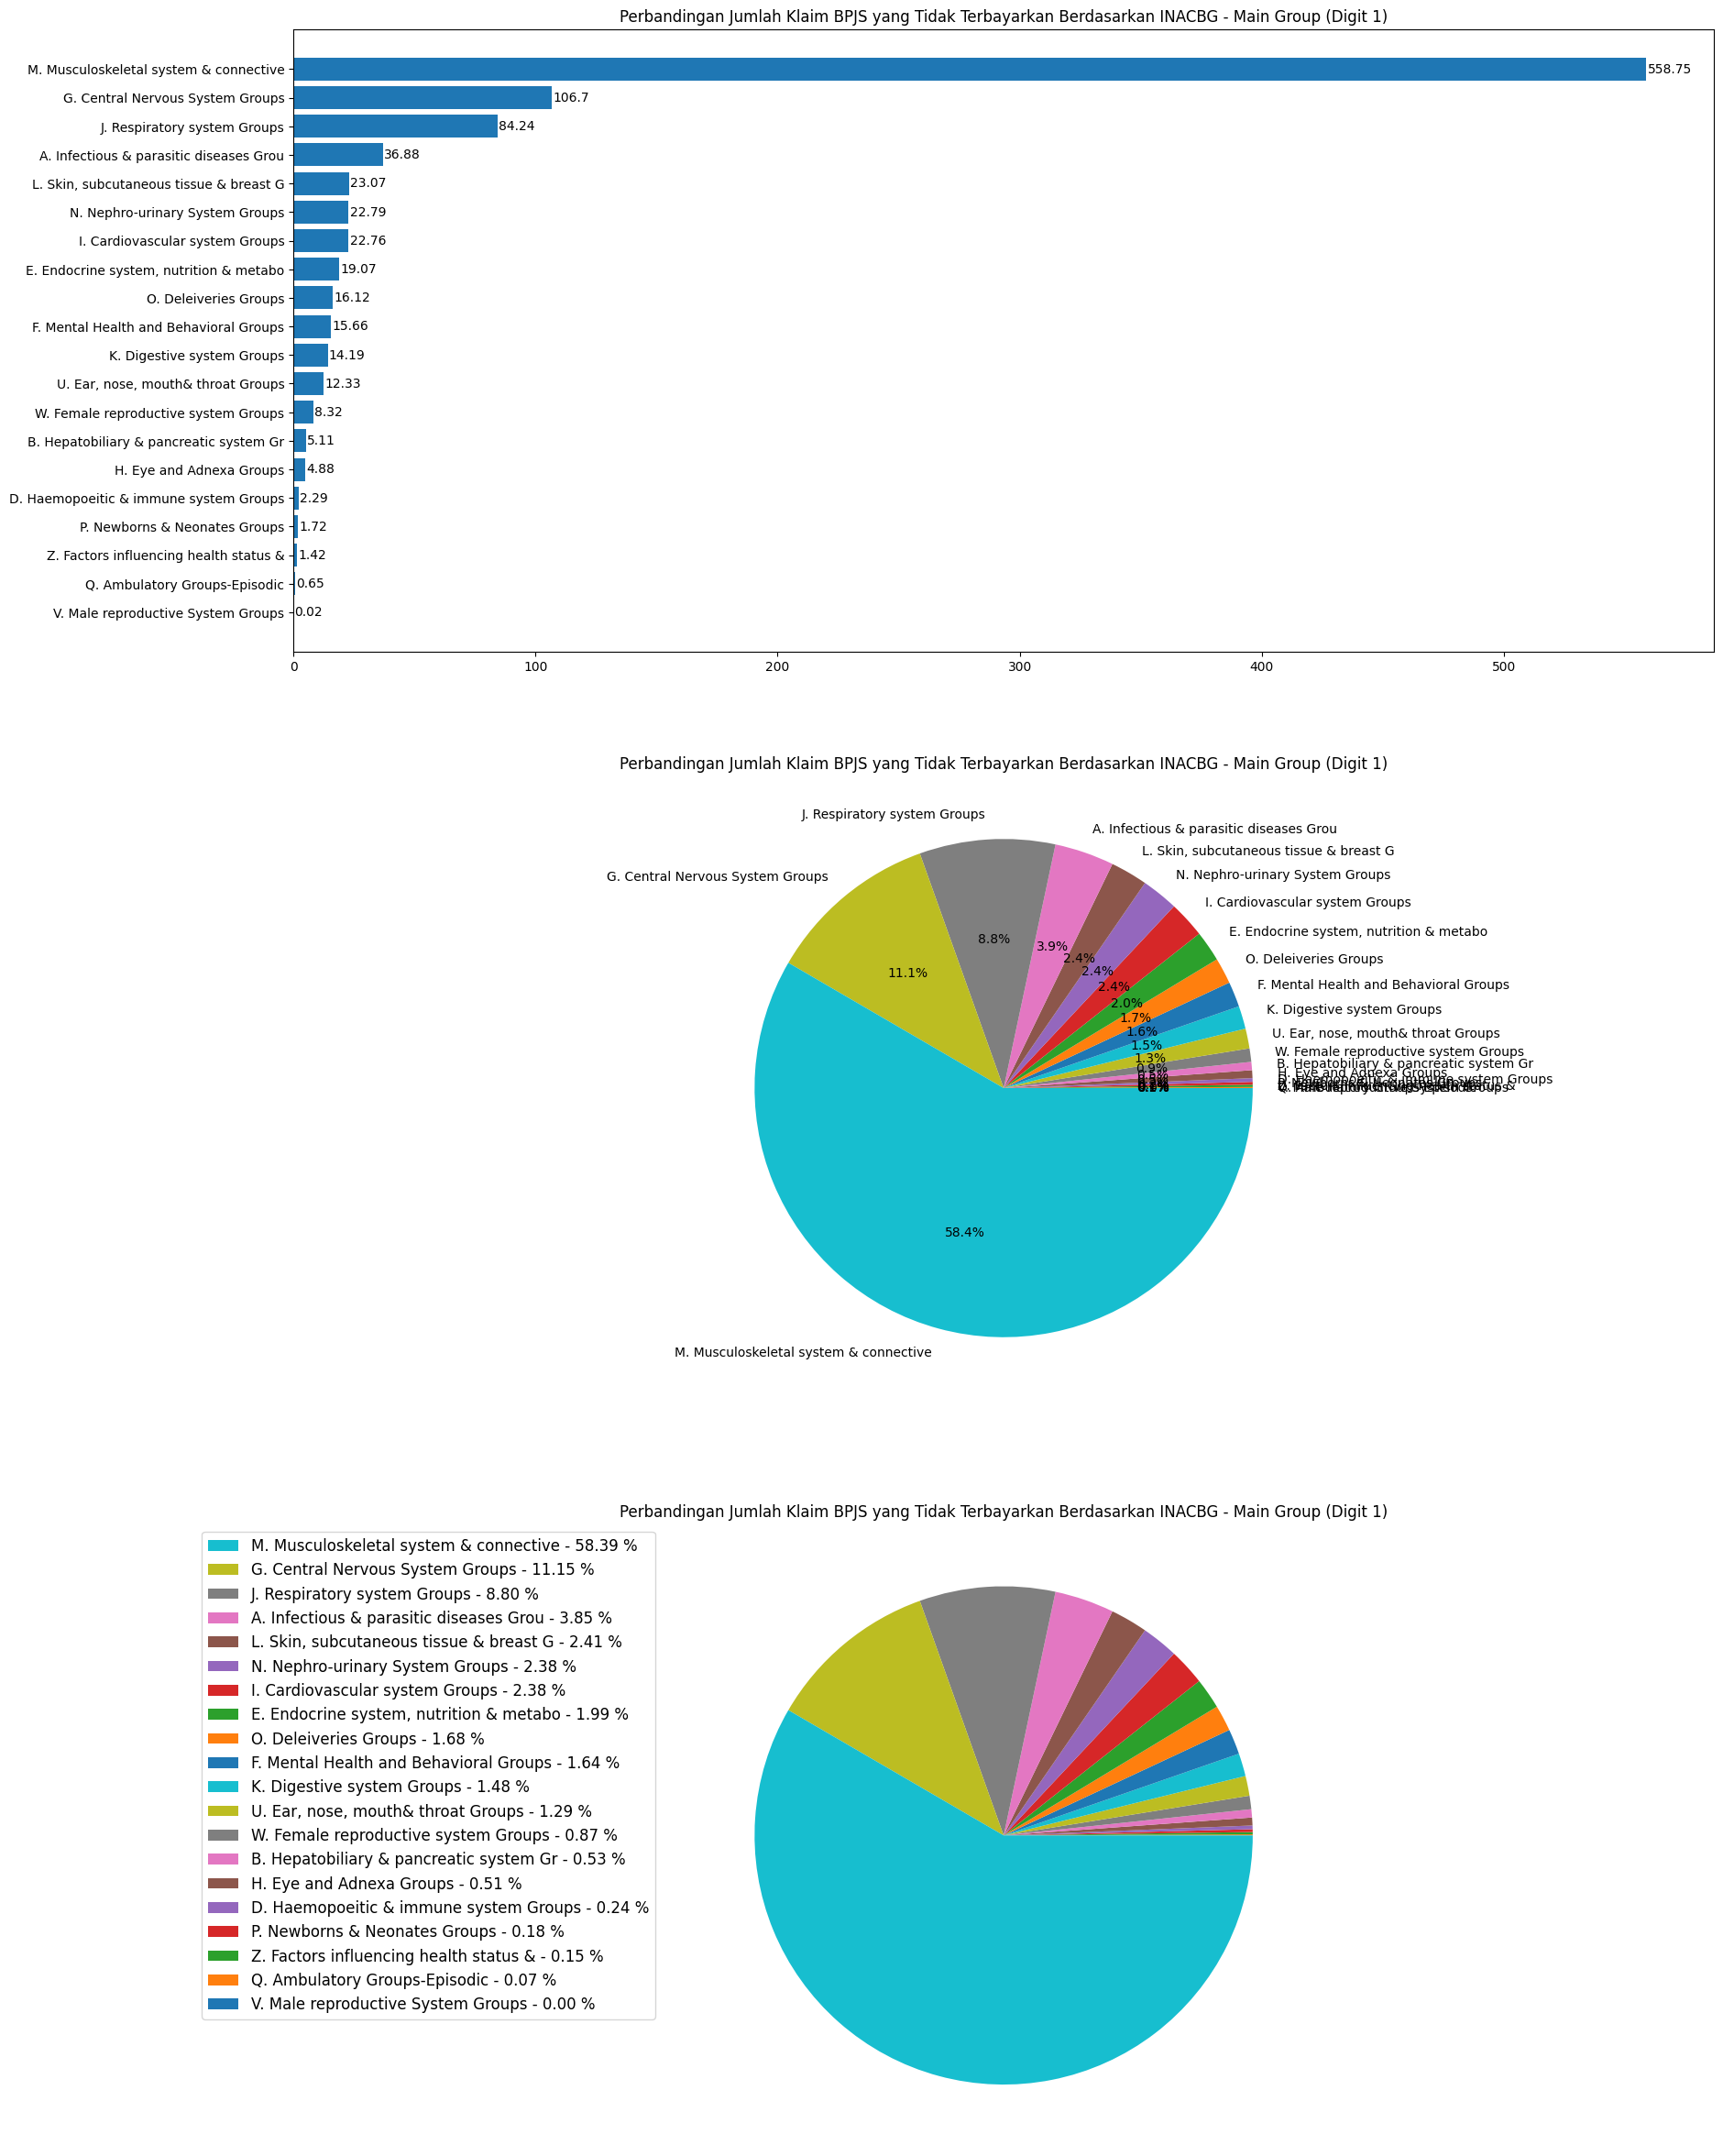

In [338]:
plt.figure(figsize=(20, 30))

labels = inacbg_agg[inacbg_agg['sum_dif'] > 0]['INACBGs - Kode Casemix main groups (Digit ke-1)']
values = inacbg_agg[inacbg_agg['sum_dif'] > 0]['sum_dif']

plt.subplot(3, 1, 1)
plt.barh(labels, values)
plt.title("Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan INACBG - Main Group (Digit 1)")
for i, value in enumerate(values):
    height = rect.get_height()
    plt.text(
        (value + 0.5), i, value, ha="left", va="center")

plt.subplot(3, 1, 2)
plt.pie(values, labels=labels, autopct="%.1f%%")
plt.title('Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan INACBG - Main Group (Digit 1)')

plt.subplot(3, 1, 3)
porcent = 100.*values/values.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]
patches, texts = plt.pie(values)
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, values),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.8, 1.),
           fontsize=12)
plt.title('Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan INACBG - Main Group (Digit 1)')

In [350]:
labels = inacbg_agg[inacbg_agg['sum_dif'] > 0]['INACBGs - Kode Casemix main groups (Digit ke-1)']
top_three = labels[-3:].iloc[::-1]
top_three

22    M. Musculoskeletal system & connective
21          G. Central Nervous System Groups
20              J. Respiratory system Groups
Name: INACBGs - Kode Casemix main groups (Digit ke-1), dtype: category
Categories (23, object): ['A. Infectious & parasitic diseases Grou' < 'B. Hepatobiliary & pancreatic system Gr' < 'C. Myeloproliferative system & neoplasm' < 'D. Haemopoeitic & immune system Groups' ... 'U. Ear, nose, mouth& throat Groups' < 'V. Male reproductive System Groups' < 'W. Female reproductive system Groups' < 'Z. Factors influencing health status &']

In [401]:
labels = inacbg_agg[inacbg_agg['sum_dif'] > 0]['INACBGs - Kode Casemix main groups (Digit ke-1)']
top_three = labels[-3:]
df_temp = df[df['INACBGs - Kode Casemix main groups (Digit ke-1)'].isin(top_three)]
df_temp['INACBGs - Kode Casemix main groups (Digit ke-1)'].cat.remove_unused_categories(inplace=True)
df_temp['INACBGs - Kode Casemix main groups (Digit ke-1)']

C:\Users\hufah\AppData\Local\Temp\ipykernel_18672\1268957954.py:4: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_temp['INACBGs - Kode Casemix main groups (Digit ke-1)'].cat.remove_unused_categories(inplace=True)


1000      M. Musculoskeletal system & connective
1201                J. Respiratory system Groups
1359            G. Central Nervous System Groups
1374                J. Respiratory system Groups
1894                J. Respiratory system Groups
                           ...                  
861970    M. Musculoskeletal system & connective
861975    M. Musculoskeletal system & connective
862020          G. Central Nervous System Groups
869795              J. Respiratory system Groups
870093    M. Musculoskeletal system & connective
Name: INACBGs - Kode Casemix main groups (Digit ke-1), Length: 70921, dtype: category
Categories (3, object): ['G. Central Nervous System Groups' < 'J. Respiratory system Groups' < 'M. Musculoskeletal system & connective']

In [414]:
inacbg_agg_parah = df_temp.groupby(['INACBGs - Kode Casemix main groups (Digit ke-1)', 'INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)']).agg(
            count=('INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)', 'count'),
        )
inacbg_agg_parah.reset_index(inplace=True)

inacbg_agg_parah['sum_dif'] = 0
for ind in inacbg_agg_parah.index:
    D1 = inacbg_agg_parah['INACBGs - Kode Casemix main groups (Digit ke-1)'][ind]
    temp = inacbg_agg[inacbg_agg['INACBGs - Kode Casemix main groups (Digit ke-1)'] == D1]['sum_dif']
    inacbg_agg_parah.iloc[ind, -1] = temp
inacbg_agg_parah.sort_values('sum_dif', inplace=True, ascending=False)
inacbg_agg_parah


,INACBGs - Kode Casemix main groups (Digit ke-1),INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4),count,sum_dif
8,M. Musculoskeletal system & connective,Rawat Jalan,48230,558.75
9,M. Musculoskeletal system & connective,Ringan (rawat inap keparahan 1),3679,558.75
10,M. Musculoskeletal system & connective,Sedang (rawat inap keparahan 2),694,558.75
11,M. Musculoskeletal system & connective,Berat (rawat inap keparahan 3),140,558.75
0,G. Central Nervous System Groups,Rawat Jalan,1697,106.70
1,G. Central Nervous System Groups,Ringan (rawat inap keparahan 1),3026,106.70
2,G. Central Nervous System Groups,Sedang (rawat inap keparahan 2),1301,106.70
3,G. Central Nervous System Groups,Berat (rawat inap keparahan 3),469,106.70
4,J. Respiratory system Groups,Rawat Jalan,4919,84.24
5,J. Respiratory system Groups,Ringan (rawat inap keparahan 1),4555,84.24


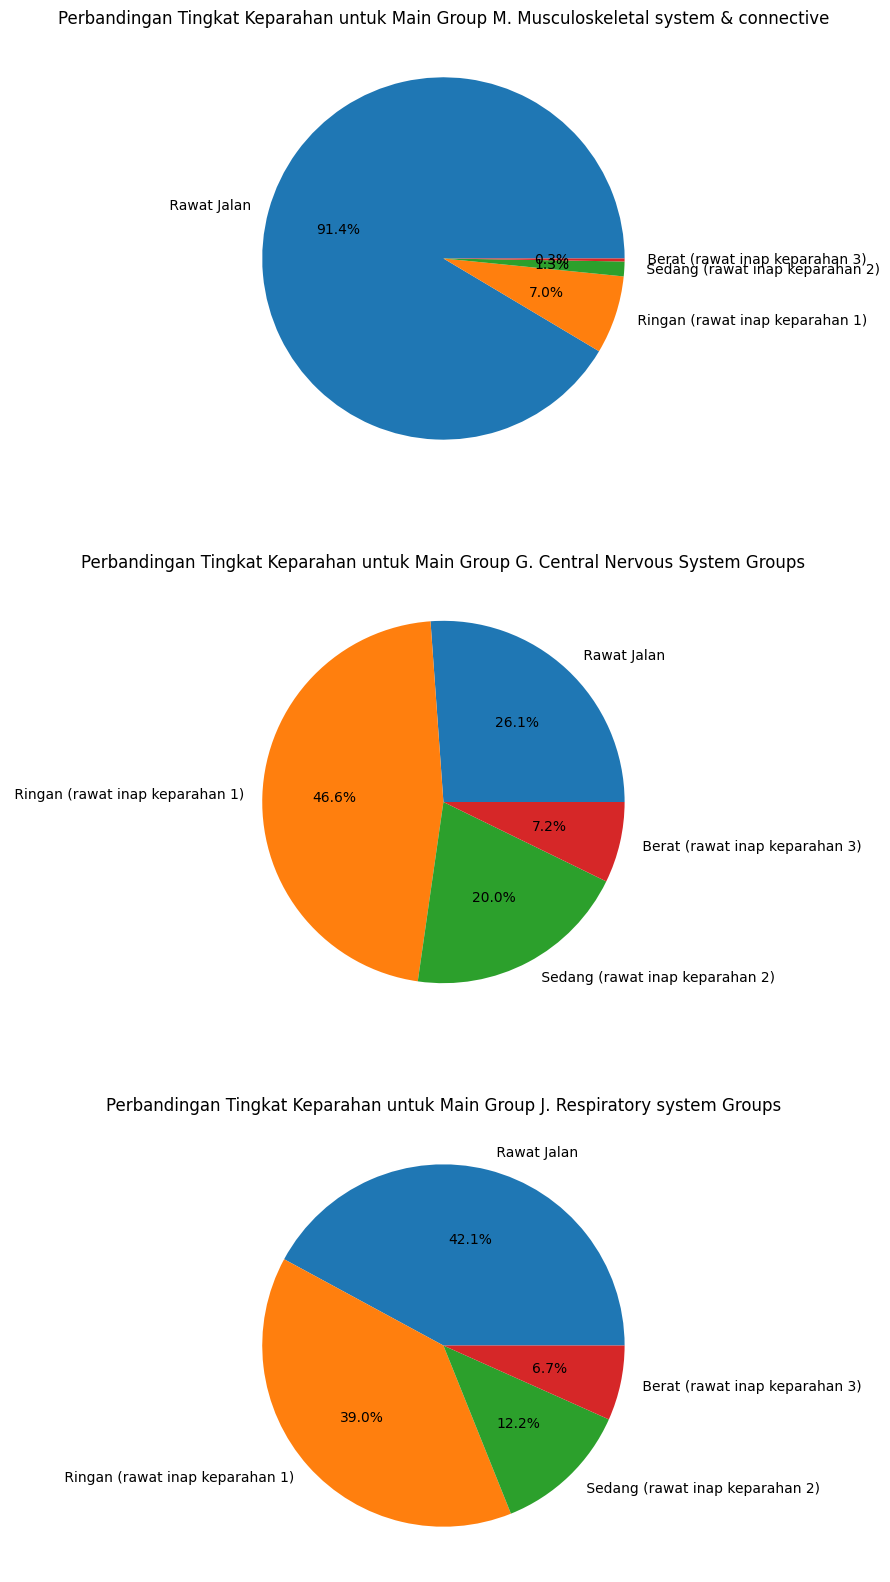

In [415]:
plt.figure(figsize=(20, 20))

top_three = inacbg_agg_parah['INACBGs - Kode Casemix main groups (Digit ke-1)'].unique()

for i, D1 in enumerate(top_three):
    plt.subplot(3, 1, i+1)
    labels = inacbg_agg_parah[inacbg_agg_parah['INACBGs - Kode Casemix main groups (Digit ke-1)'] == top_three[i]]['INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)']
    values = inacbg_agg_parah[inacbg_agg_parah['INACBGs - Kode Casemix main groups (Digit ke-1)'] == top_three[i]]['count']
    plt.pie(values, labels=labels, autopct="%.1f%%")
    plt.title(f'Perbandingan Tingkat Keparahan untuk Main Group {top_three[i]}')

### Segmen Peserta saat akses layanan FKRTL	

In [ ]:
segment_agg = df.groupby('Segmen Peserta saat akses layanan FKRTL').agg(
            count=('Segmen Peserta saat akses layanan FKRTL', 'count'),
            sum_klaim=('Biaya Tagih - oleh fasilitas kesehatan (provider)', 'sum'),
            sum_verif=('Biaya Verifikasi - BPJS Kesehatan setelah dilakukan verifikasi', 'sum'),
        )
segment_agg['sum_dif'] = segment_agg.apply(lambda x: x[-2] - x[-1], axis=1)
segment_agg.reset_index(inplace=True)
segment_agg.iloc[:, 2:] = round(segment_agg.iloc[:, 2:] / 1e6, 2)


In [420]:
segment_agg.sort_values(by='sum_dif', ascending=True, inplace=True)
segment_agg.reset_index(inplace=True, drop=True)
segment_agg

,Segmen Peserta saat akses layanan FKRTL,count,sum_klaim,sum_verif,sum_dif
0,PBI APBD,67078,60706.79,60651.99,54.79
1,Bukan pekerja,74826,54357.86,54260.65,97.21
2,PBI APBN,97618,91063.21,90863.36,199.85
3,PBPU,343310,298541.06,298266.47,274.59
4,PPU,289369,255701.59,255371.08,330.51


Text(0.5, 1.0, 'Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Segment Peserta')

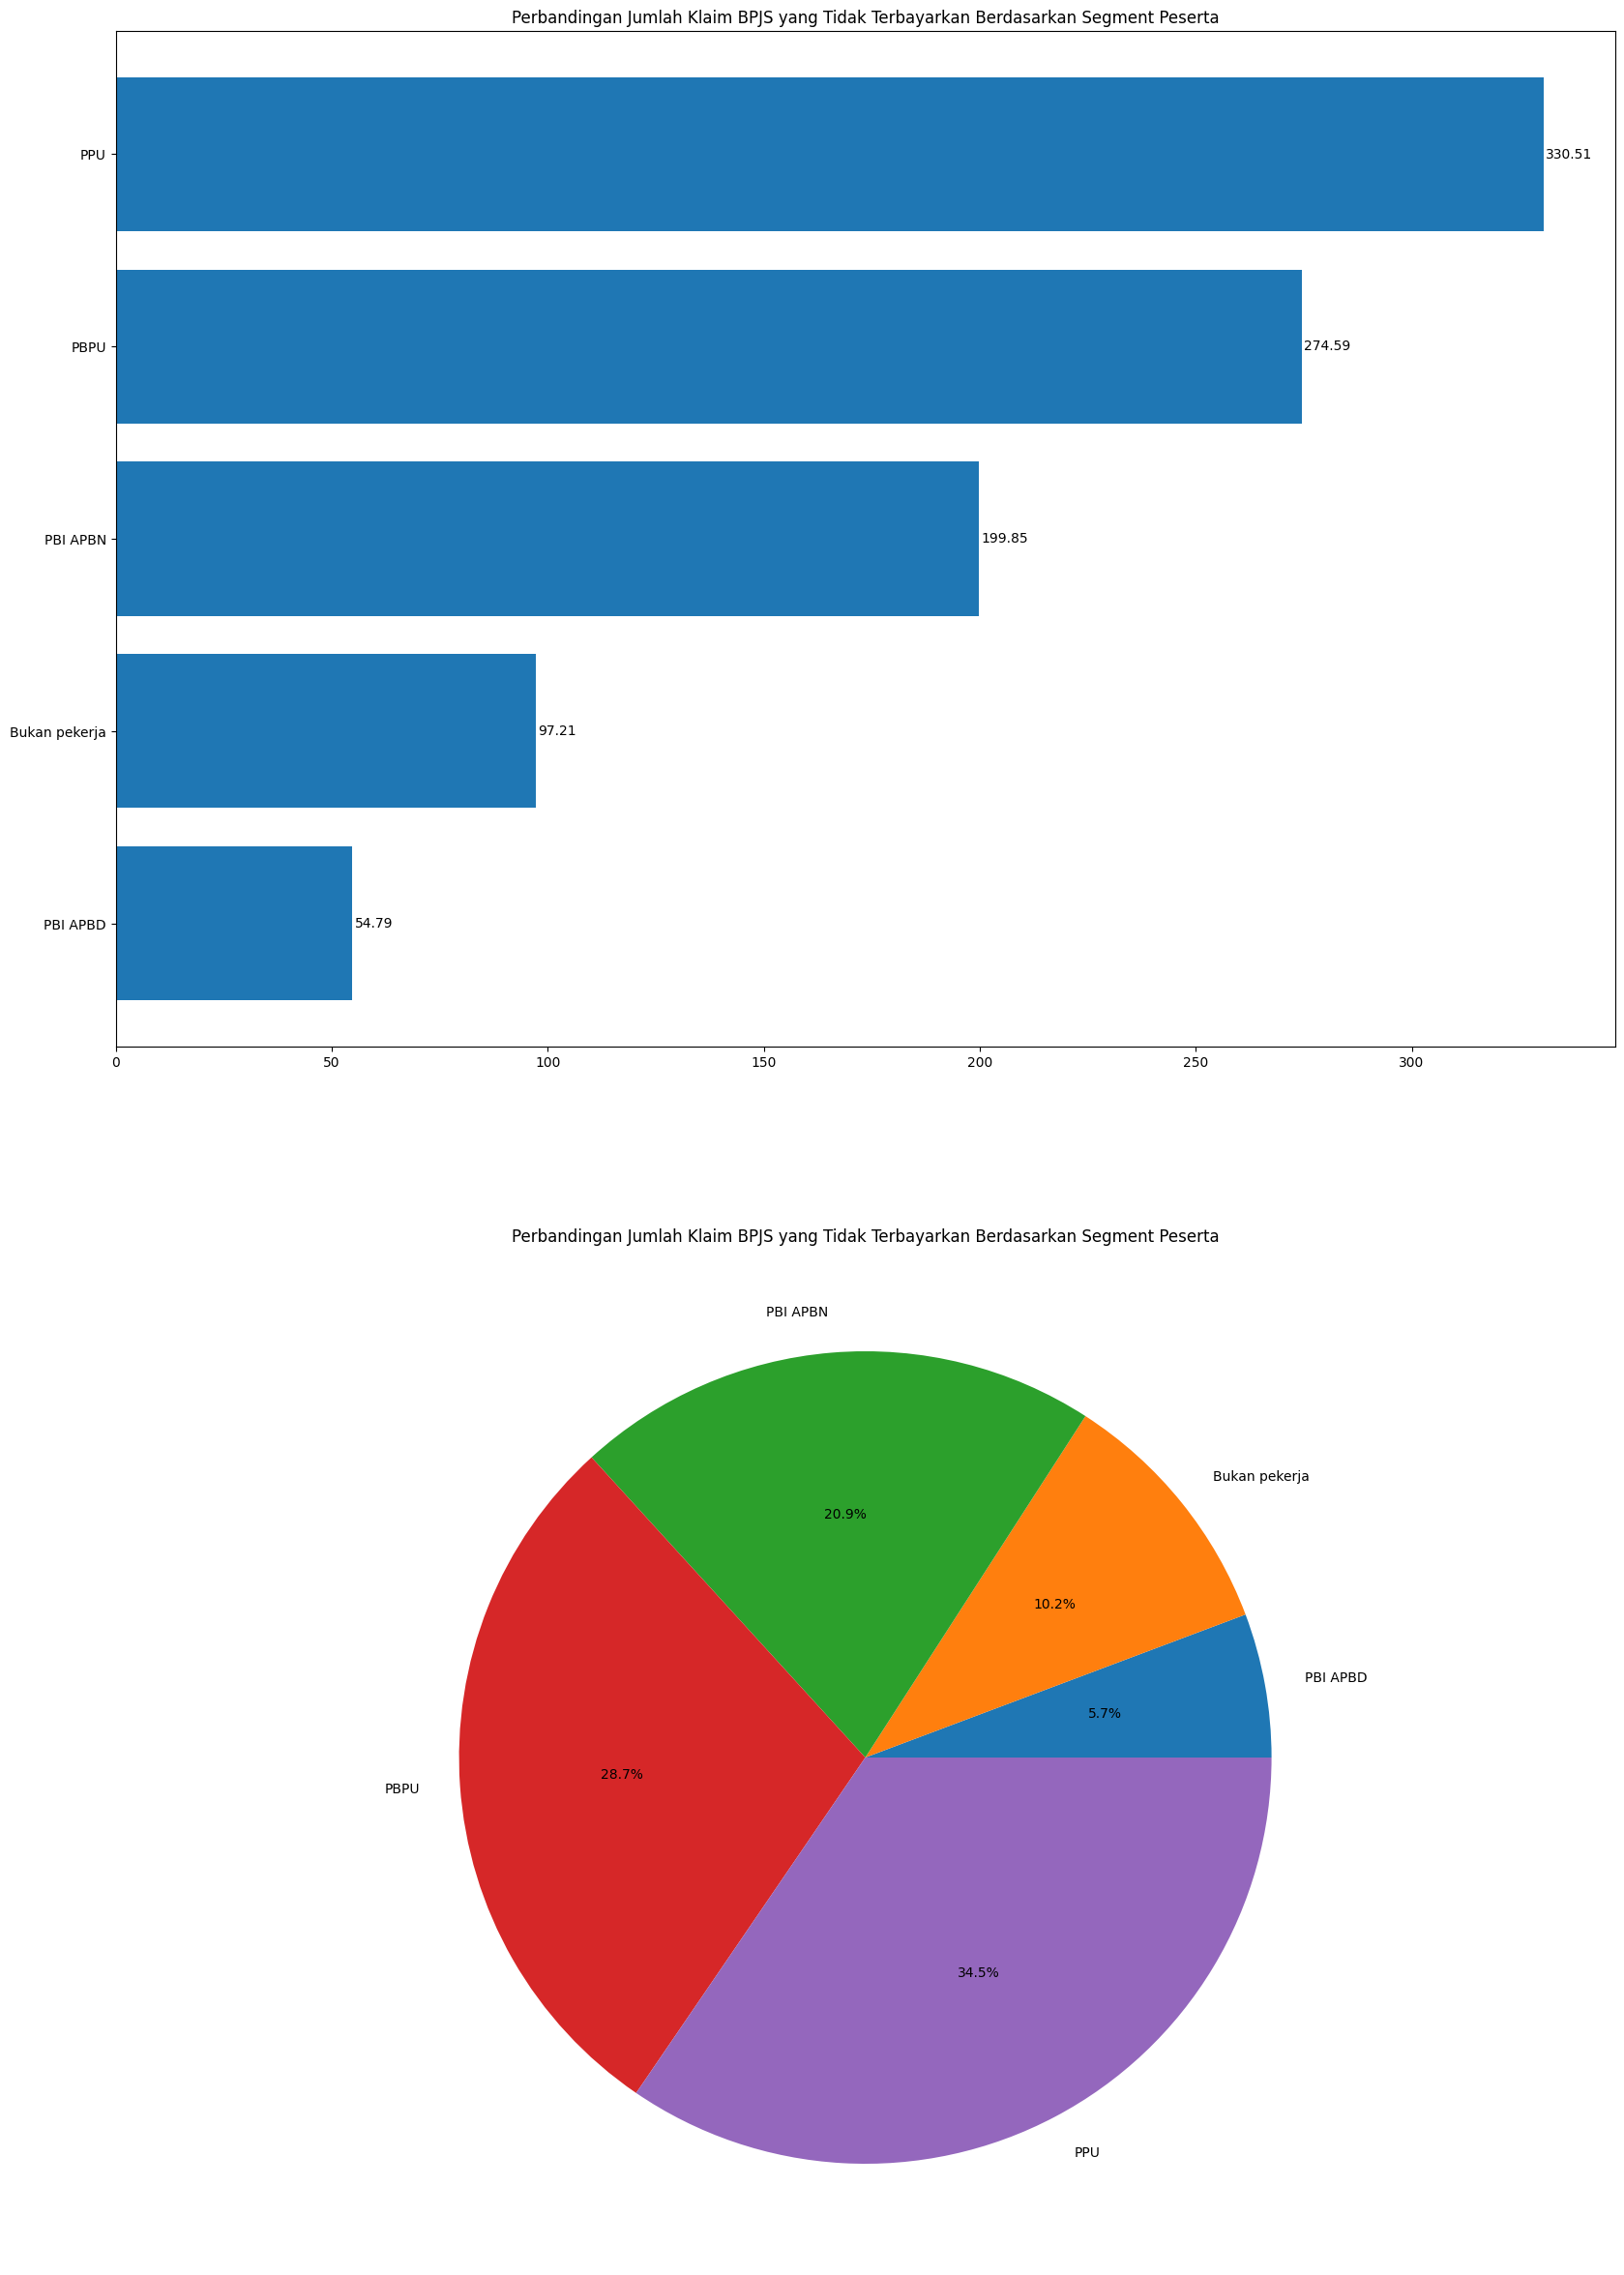

In [423]:
plt.figure(figsize=(20, 30))

labels = segment_agg[segment_agg['sum_dif'] > 0]['Segmen Peserta saat akses layanan FKRTL']
values = segment_agg[segment_agg['sum_dif'] > 0]['sum_dif']

plt.subplot(2, 1, 1)
plt.barh(labels, values)
plt.title("Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Segment Peserta")
for i, value in enumerate(values):
    height = rect.get_height()
    plt.text(
        (value + 0.5), i, value, ha="left", va="center")

plt.subplot(2, 1, 2)
plt.pie(values, labels=labels, autopct="%.1f%%")
plt.title('Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Segment Peserta')


- PBI APBN : Penerima Bantuan Iuran (PBI) APBN
- PBI APBD : Penerima Bantuan Iuran (PBI) APBD
- PBPU : Peserta Bukan Penerima Upah : Peserta JKN yang bekerja mandiri dan iurannya dibiayai oleh peserta yang bersangkutan.
- Pekerja Penerima Upah (PPU) : Peserta JKN yang terdiri dari PNS, TNI/ POLRI, Pejabat Negara, dan Pegawai Pemerintah Non Pegawai Negeri yangiurannya dibiayai oleh pemberi kerja dan peserta yang bersangkutan.
- Bukan Pekerja : mereka yang mendaftarkan keanggotaannya secara mandiri dan bukan merupakan karyawan yang didaftarkan oleh perusahaan

BPJS PBI merupakan salah satu program dari BPJS Kesehatan yang dibuat khusus untuk orang-orang yang membutuhkan (1-2)

### Region

In [426]:
region_agg = df.groupby('Provinsi FKRTL').agg(
            count=('Provinsi FKRTL', 'count'),
            sum_klaim=('Biaya Tagih - oleh fasilitas kesehatan (provider)', 'sum'),
            sum_verif=('Biaya Verifikasi - BPJS Kesehatan setelah dilakukan verifikasi', 'sum'),
        )
region_agg['sum_dif'] = region_agg.apply(lambda x: x[-2] - x[-1], axis=1)
region_agg.reset_index(inplace=True)
region_agg.iloc[:, 2:] = round(region_agg.iloc[:, 2:] / 1e6, 2)


c:\Users\hufah\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


In [431]:
region_agg.sort_values(by='sum_dif', ascending=True, inplace=True)
region_agg.reset_index(inplace=True, drop=True)
region_agg.head()

,Provinsi FKRTL,count,sum_klaim,sum_verif,sum_dif
0,KEPULAUAN RIAU,9096,7140.18,7140.18,0.0
1,PAPUA BARAT,2455,2658.50,2658.50,0.0
2,KALIMANTAN TENGAH,6574,6954.28,6954.28,0.0
3,SULAWESI TENGAH,9199,7473.76,7473.76,0.0
4,SULAWESI BARAT,2532,2097.29,2097.29,0.0


Text(0.5, 1.0, 'Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Provinsi FKRTL')

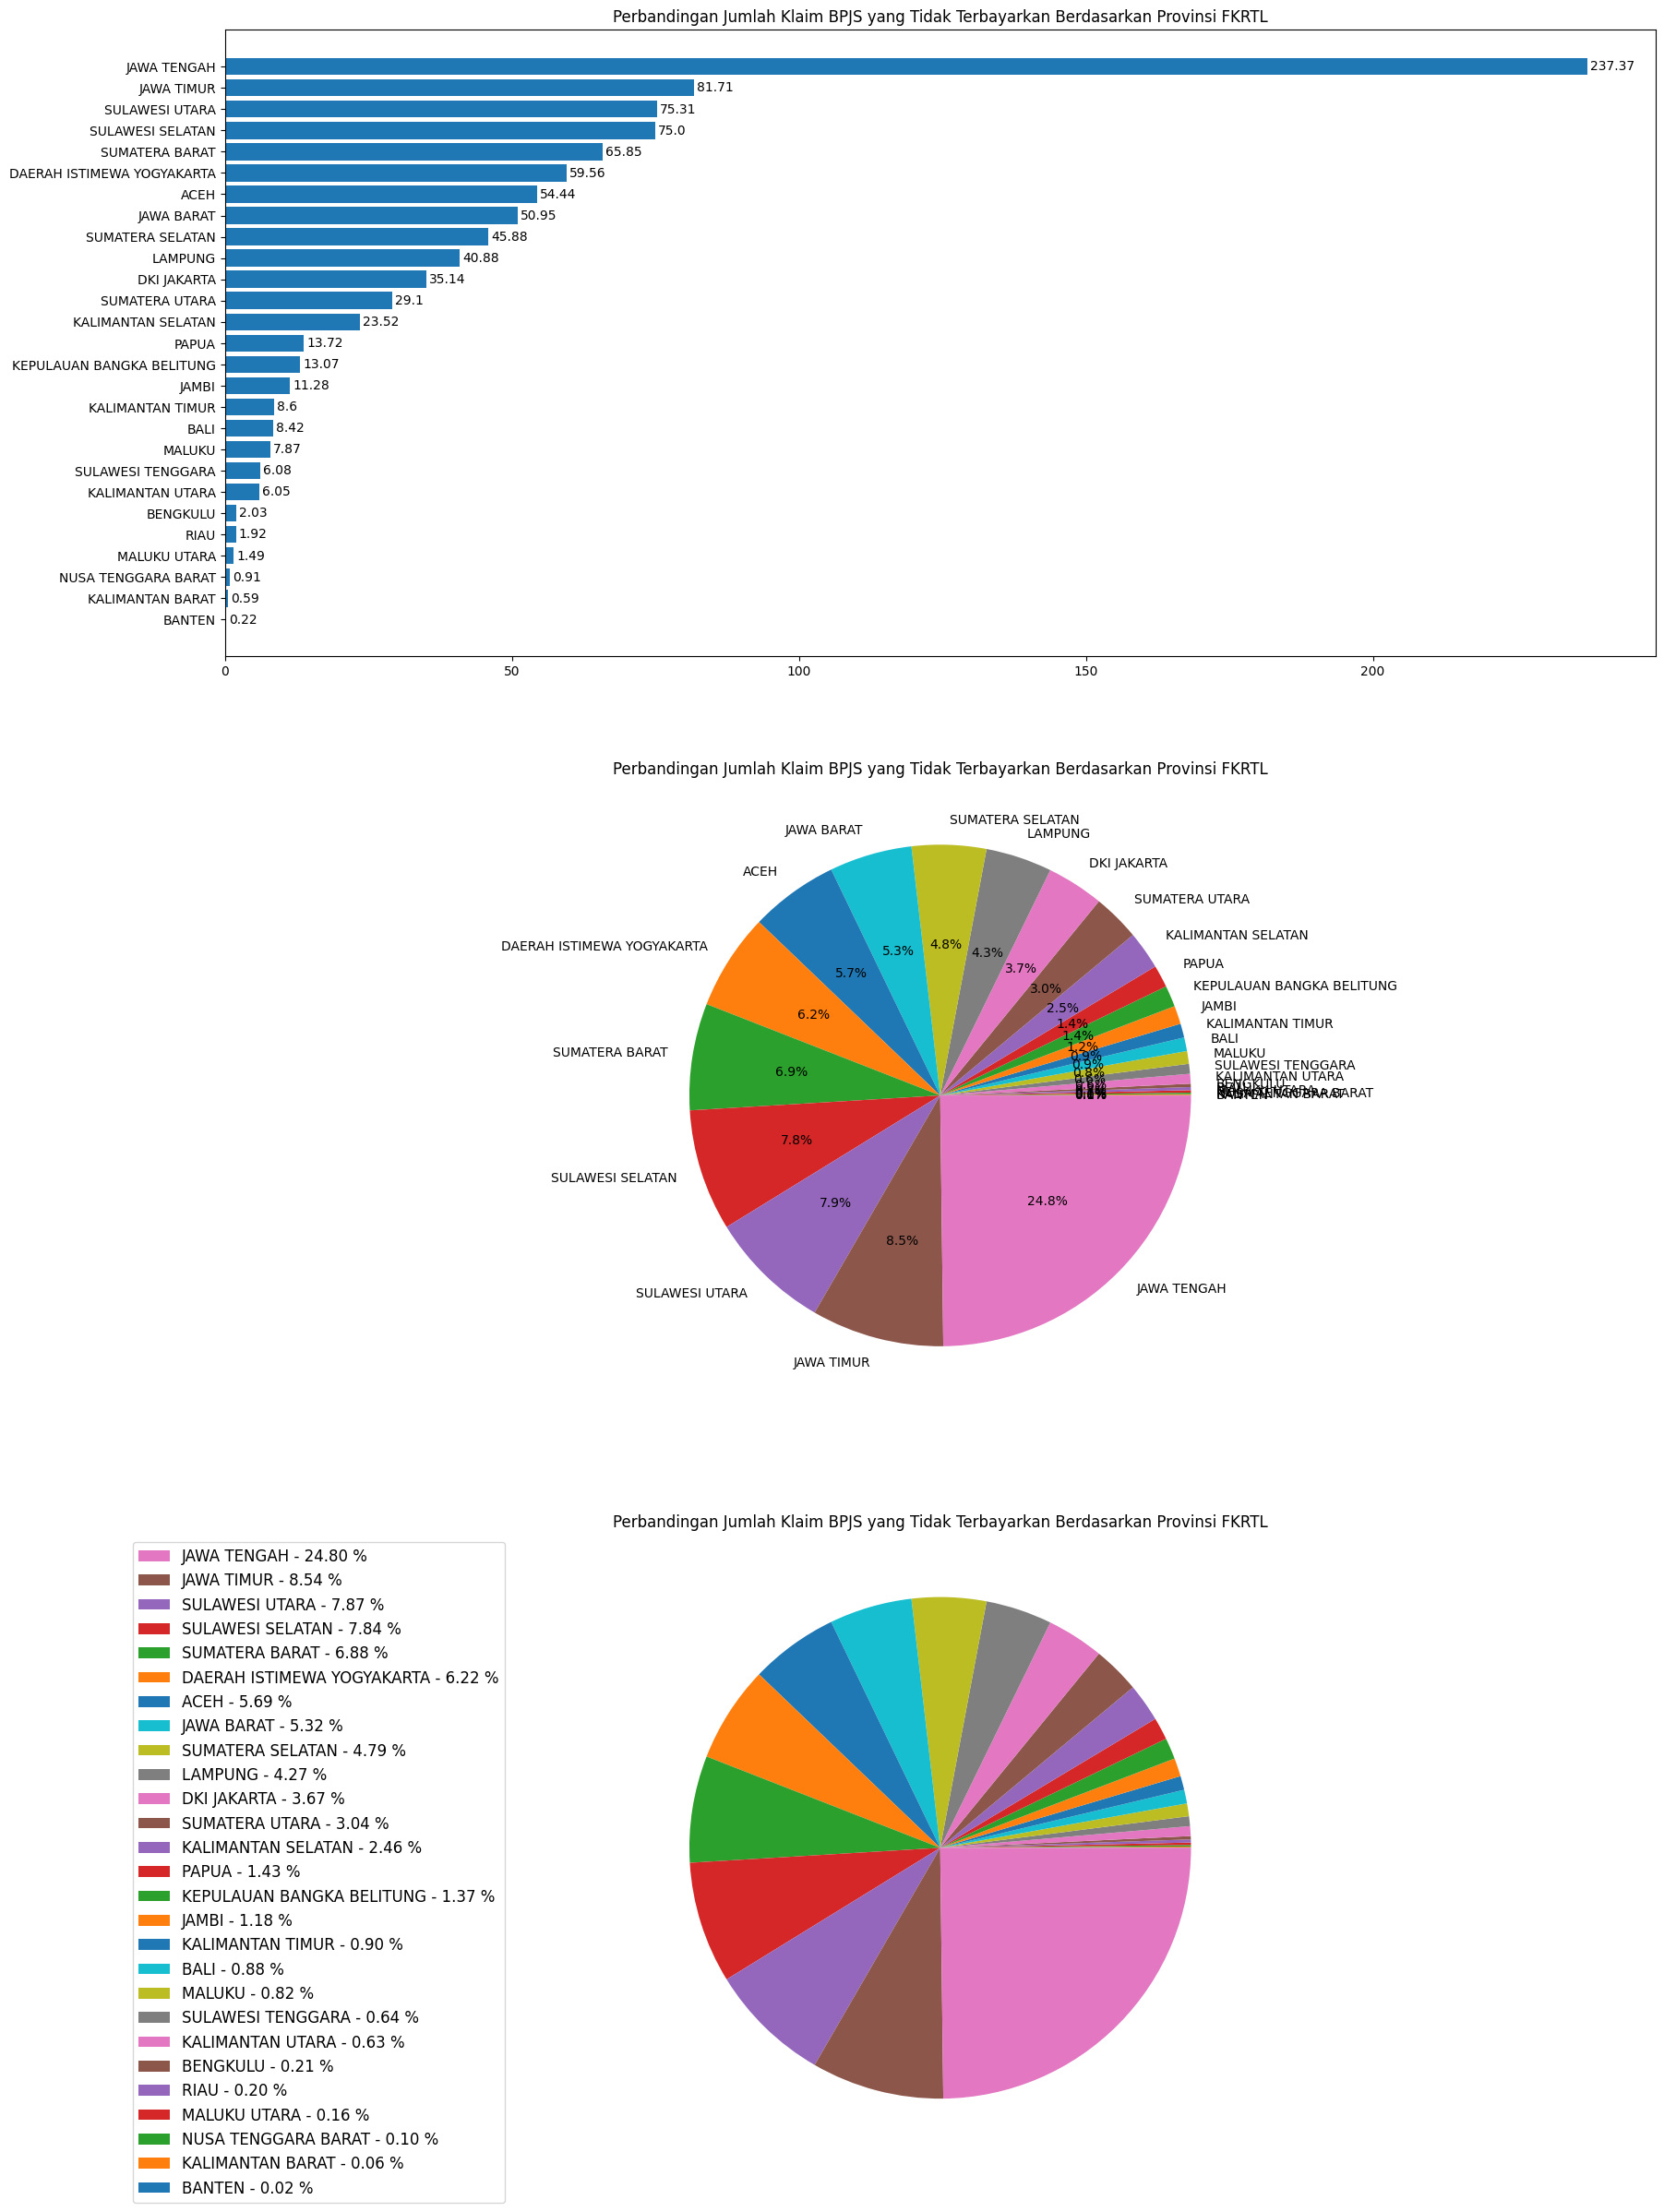

In [434]:
plt.figure(figsize=(20, 30))

labels = region_agg[region_agg['sum_dif'] > 0]['Provinsi FKRTL']
values = region_agg[region_agg['sum_dif'] > 0]['sum_dif']

plt.subplot(3, 1, 1)
plt.barh(labels, values)
plt.title("Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Provinsi FKRTL")
for i, value in enumerate(values):
    height = rect.get_height()
    plt.text(
        (value + 0.5), i, value, ha="left", va="center")

plt.subplot(3, 1, 2)
plt.pie(values, labels=labels, autopct="%.1f%%")
plt.title('Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Provinsi FKRTL')

plt.subplot(3, 1, 3)
porcent = 100.*values/values.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]
patches, texts = plt.pie(values)
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, values),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.8, 1.),
           fontsize=12)
plt.title('Perbandingan Jumlah Klaim BPJS yang Tidak Terbayarkan Berdasarkan Provinsi FKRTL')